<a href="https://colab.research.google.com/github/HemantGorle/Functional_API/blob/main/Functional_API_Model_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# importing dependencies
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # this is to suppress TensorFlow warnings and information

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.layers import Input, InputLayer 
from tensorflow.keras.datasets import mnist # imporing mnist dataset


In [15]:
# downloading data in train, test split format

(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist data is stored with train-test split 
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0 # normalizing the input by dividing 255 
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

In [31]:
# defining functional model with 3 layers and one output layer
inputs = keras.Input(shape = (28*28)) # define input
x = layers.Dense(512, activation = "relu", name = "first_layer")(inputs)
x = layers.Dense(256, activation = "relu", name = "second_layer")(x)
x = layers.Dense(128, activation = "relu", name = "third_layer")(x)
x = Dropout(0.5)(x)

# define output
outputs = layers.Dense(10, activation = "softmax")(x) # using softmax on output layer, 10 nodes as we have 10 output digit

# functional model
model = keras.Model(inputs = inputs, outputs = outputs)


In [32]:
# print model summary
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
first_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
second_layer (Dense)         (None, 256)               131328    
_________________________________________________________________
third_layer (Dense)          (None, 128)               32896     
_________________________________________________________________
tf.identity_2 (TFOpLambda)   (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_____________________________________________________

In [33]:
# compiling model 
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = "accuracy"
)

In [34]:
# fitting the model on training data with batch size 64 and 10 epochs
history = model.fit(x_train, y_train, batch_size = 64, epochs = 10, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/10
938/938 - 3s - loss: 0.2020 - accuracy: 0.9386 - val_loss: 0.1034 - val_accuracy: 0.9681
Epoch 2/10
938/938 - 2s - loss: 0.0820 - accuracy: 0.9745 - val_loss: 0.0810 - val_accuracy: 0.9732
Epoch 3/10
938/938 - 2s - loss: 0.0563 - accuracy: 0.9821 - val_loss: 0.0697 - val_accuracy: 0.9798
Epoch 4/10
938/938 - 2s - loss: 0.0453 - accuracy: 0.9854 - val_loss: 0.1061 - val_accuracy: 0.9699
Epoch 5/10
938/938 - 2s - loss: 0.0329 - accuracy: 0.9893 - val_loss: 0.0873 - val_accuracy: 0.9774
Epoch 6/10
938/938 - 2s - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0701 - val_accuracy: 0.9808
Epoch 7/10
938/938 - 2s - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0710 - val_accuracy: 0.9817
Epoch 8/10
938/938 - 2s - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0724 - val_accuracy: 0.9812
Epoch 9/10
938/938 - 2s - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0903 - val_accuracy: 0.9785
Epoch 10/10
938/938 - 2s - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0813 - val_accuracy: 0.9794

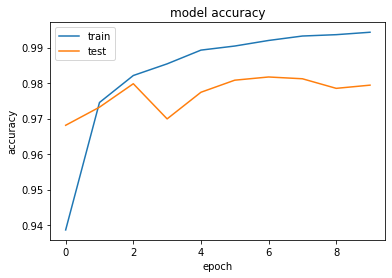

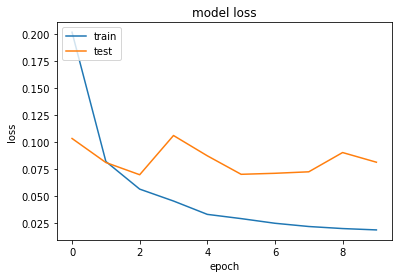

In [35]:
history_dict = model.history
history_dict.history.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()